<a href="https://colab.research.google.com/github/bartlomiejmiszewski/Nauka/blob/main/02_Szoklenie_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Braki danych - ćwiczenia
#### Uzywane moetody/biblioteki w tym ćwiczeniu:


*   fillna()
*   from sklearn.impute import SimpleImputer



### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Utworzenie kopii danych](#2)
4. [Sprawdzenie ilości braków](#3)
5. [Filtrowanie braków](#4)
6. [Uzupełnienie braków - SimpleImputer](#5)
7. [Uzupełnianie danych - fillna()](#6)
8. [Braki danych w szeregach czasowych](#7)

### <a name='0'></a> 1. Import bibliotek

In [56]:
import pandas as pd
import numpy as np
import sklearn

sklearn.__version__

'0.22.2.post1'

### <a name='1'></a> 2. Wygenerowanie danych

In [57]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)

### <a name='2'></a> 3. Utworzenie kopii danych

In [58]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


### <a name='3'></a> 4. Sprawdzanie ilości braków

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


In [60]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [61]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [62]:
df.isnull().sum().sum()

5

In [63]:
df.isnull().sum() / len(df)

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

### <a name='4'></a> 5. Filtrowanie braków

In [64]:
df[pd.isnull(df['weight'])] #wyfiltrowane rekordy z df gdzie w kolumnie 'weight' są wartoścu null

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [65]:
df[~pd.isnull(df['weight'])] #odwrócenie poprzedniej operacji. Wyfiltrowanie tych rekordów z df gdzie w kolumnie 'weight' nie ma wartości null

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


### <a name='5'></a> 6. Uzupełnianie braków - SimpleImputer

In [66]:
from sklearn.impute import SimpleImputer

In [67]:
# strategy: 'mean', 'median', 'most_frequent', 'constant'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [68]:
imputer.statistics_

array([415.])

In [69]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [70]:
df['weight'] = imputer.transform(df[['weight']])

In [71]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [72]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[['gender']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [73]:
imputer.statistics_

array(['female'], dtype=object)

In [74]:
df['gender'] = imputer.transform(df[['gender']])

In [75]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,female,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


### <a name='6'></a> 7. Uzupełnianie braków - fillna()

In [76]:
df = df_raw.copy()

In [77]:
#uzupełnianie stałą wartością
df.fillna(value='brak')
#df.fillna(value=0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199,500,yes
1,L,green,male,89,450,no
2,M,blue,brak,brak,300,yes
3,brak,green,female,129,brak,no
4,M,red,female,79,410,yes
5,M,green,male,89,brak,no


In [78]:
df['weight'].fillna(value=df['weight'].mean())

0    500.0
1    450.0
2    300.0
3    415.0
4    410.0
5    415.0
Name: weight, dtype: float64

In [79]:
df['weight'].fillna(value=df['weight'].mean(), inplace=True)
df['price'].fillna(value=df['price'].mean(), inplace=True)
df['size'].fillna(value='L', inplace=True)
df['gender'].fillna(value='female', inplace=True)

In [80]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,female,117.0,300.0,yes
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [81]:
df = df_raw.copy()

#dropna()

df.dropna(how='any')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


### <a name='7'></a> 8. Braki danych w szeregach czasowych

In [82]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


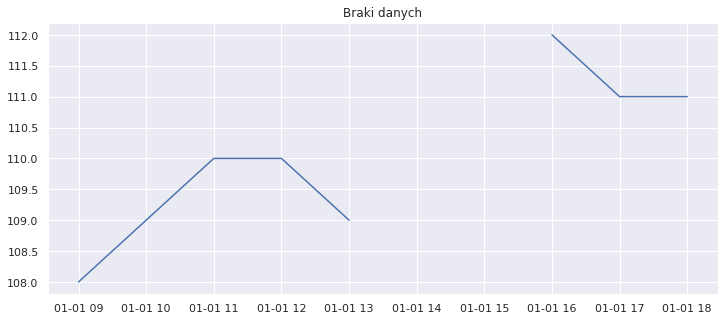

In [83]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize=(12, 5))
plt.title('Braki danych')
_ = plt.plot(df.price)

In [84]:
import plotly.express as px #fajna biblioteka do tworzenia interaktywnych wykresów

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

Pierwszy spsób: usunięcie braków

In [89]:
df_plotly = df.reset_index()
df_plotly = df_plotly.dropna()
px.line(
    df_plotly, 
    x='index', 
    y='price', 
    width=600, 
    height=400, 
    title='Szeregi czasowe - braki danych - usunięcie braków'
)

Drugi sposób: wstawienie 0

In [90]:
df_plotly = df.reset_index()
df_plotly = df_plotly.fillna(value=0)

px.line(
    df_plotly,
    x='index',
    y='price',
    width=600,
    height=400,
    title='Szeregi czasowe - braki danych - wstawienie 0'
)

Trzeci sposób: wstawienie średniej

In [92]:
df_plotly = df.reset_index()
df_plotly = df_plotly.fillna(value=df['price'].mean())

px.line(
    df_plotly,
    x='index',
    y='price',
    width=600,
    height=400,
    title='Szeregi czasowe - braki danych - wstawienie średniej'
)

Czwarty sposób: Interpolacja

In [96]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, 
        title='Szeregi czasowe - braki danych - interpolacja')

Piąty sposób: forward fill

In [97]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, 
        title='Szeregi czasowe - braki danych - forward fill')

In [98]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, 
        title='Szeregi czasowe - braki danych')